In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
X,y=load_breast_cancer(return_X_y=True)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf=DecisionTreeClassifier(random_state=0)

In [6]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
pred=clf.predict(X_test)

In [8]:
accuracy_score(y_test,pred)

0.8811188811188811

In [9]:
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

[Text(187.32857142857142, 205.35999999999999, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(119.57142857142857, 181.2, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(79.71428571428572, 157.04, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(47.82857142857143, 132.88, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(31.885714285714286, 108.72, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(15.942857142857143, 84.56, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(47.82857142857143, 84.56, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(31.885714285714286, 60.400000000000006, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(63.77142857142857, 60.400000000000006, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(47.82857142857143, 36.24000000000001, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(31.

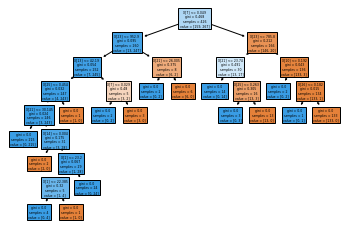

In [10]:
tree.plot_tree(clf,filled=True)

In [11]:
path=clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [12]:
print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]
***********************************************************
Impurities in Decision Tree : [0.         0.00453294 0.01847522 0.02313502 0.02876883 0.03581108
 0.04365302 0.05276704 0.0642107  0.0831987  0.10634033 0.14056508
 0.46786352]


In [13]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.3272984419327777


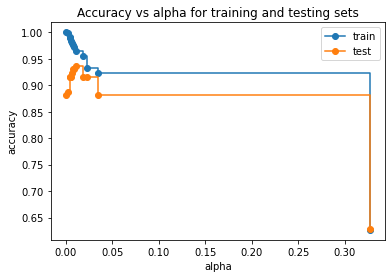

In [15]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [16]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.012)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [17]:
pred=clf.predict(X_test)
accuracy_score(y_test,pred)

0.9370629370629371

[Text(418.5, 475.65000000000003, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(209.25, 339.75, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(104.625, 203.85000000000002, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(313.875, 203.85000000000002, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(627.75, 339.75, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(523.125, 203.85000000000002, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(418.5, 67.94999999999999, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(627.75, 67.94999999999999, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(732.375, 203.85000000000002, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

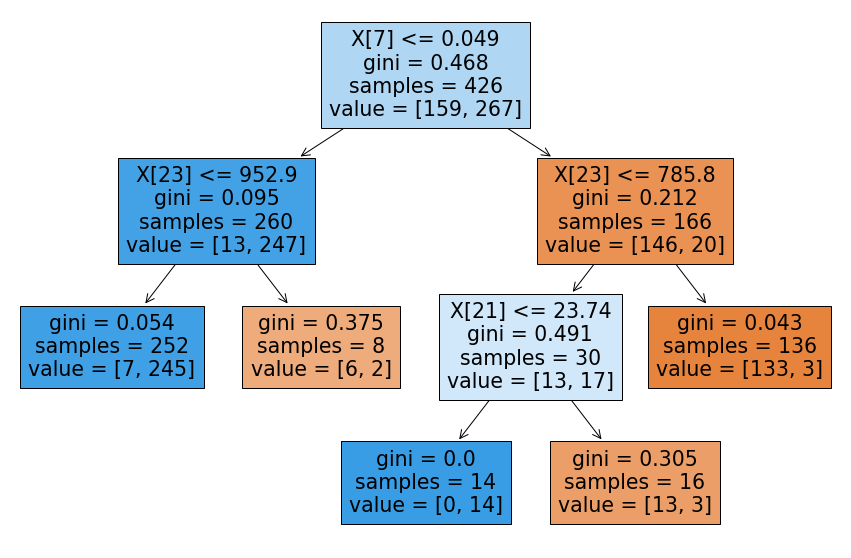

In [18]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)